## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from matplotlib import style
from Linear_Regression.models.linear_regression import LinearRegression as LR
from Linear_Regression.models.regression_metrics import RegressionMetrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Set the plot style to dark background

In [2]:
style.use("dark_background")

## Load and inspect the dataset

In [3]:
df = pd.read_csv("../data/Salary_dataset.csv")
print(df.head())
print(df.info())

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes
None


## Drop the unnecessary column

In [4]:
df.drop(columns=["Unnamed: 0"], axis=1, inplace=True)
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


## Extract features and target variable

In [5]:
X = df["YearsExperience"].values
y = df["Salary"].values

print(f"X:  {X}")
print("----------------")
print(f"y  {y}")

X:  [ 1.2  1.4  1.6  2.1  2.3  3.   3.1  3.3  3.3  3.8  4.   4.1  4.1  4.2
  4.6  5.   5.2  5.4  6.   6.1  6.9  7.2  8.   8.3  8.8  9.1  9.6  9.7
 10.4 10.6]
----------------
y  [ 39344.  46206.  37732.  43526.  39892.  56643.  60151.  54446.  64446.
  57190.  63219.  55795.  56958.  57082.  61112.  67939.  66030.  83089.
  81364.  93941.  91739.  98274. 101303. 113813. 109432. 105583. 116970.
 112636. 122392. 121873.]


## Split the data into training and testing sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Reshape the data to fit the model

In [7]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

## Train the Linear Regression model built from Scratch

In [8]:
lr_custom = LR()
lr_custom.fit(X_train, y_train)
y_pred_custom = lr_custom.predict(X_test)

## Train the Linear Regression model from Sklearn

In [9]:
lr_sklearn = LinearRegression()
lr_sklearn.fit(X_train, y_train)
y_pred_sklearn = lr_sklearn.predict(X_test)

## Plot the training dataset

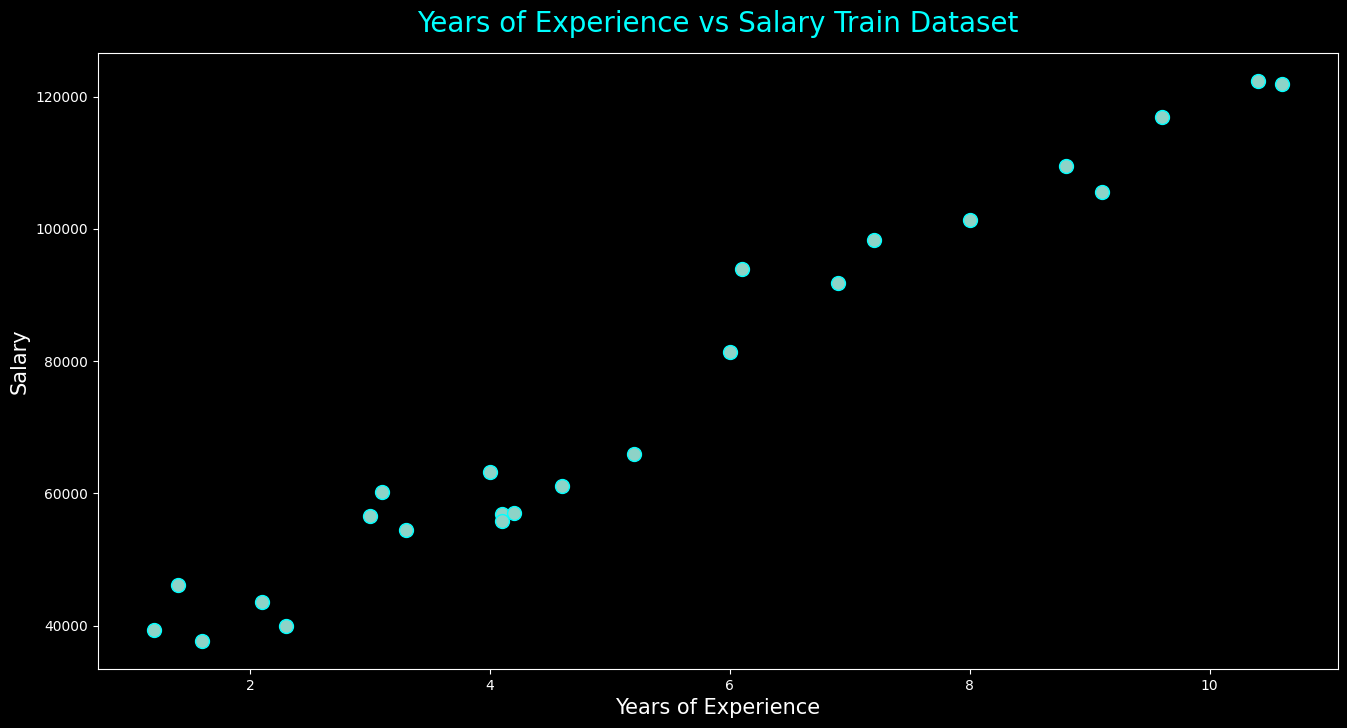

In [10]:
plt.figure(figsize=(16,8))
plt.scatter(X_train, y_train, marker="o", edgecolors="aqua", s=100)
plt.title(label="Years of Experience vs Salary Train Dataset", fontdict={"color": "aqua", "fontsize": 20}, pad=15)
plt.xlabel(xlabel="Years of Experience", fontsize=15)
plt.ylabel(ylabel="Salary", fontsize=15)
plt.show()

## Plot the testing dataset

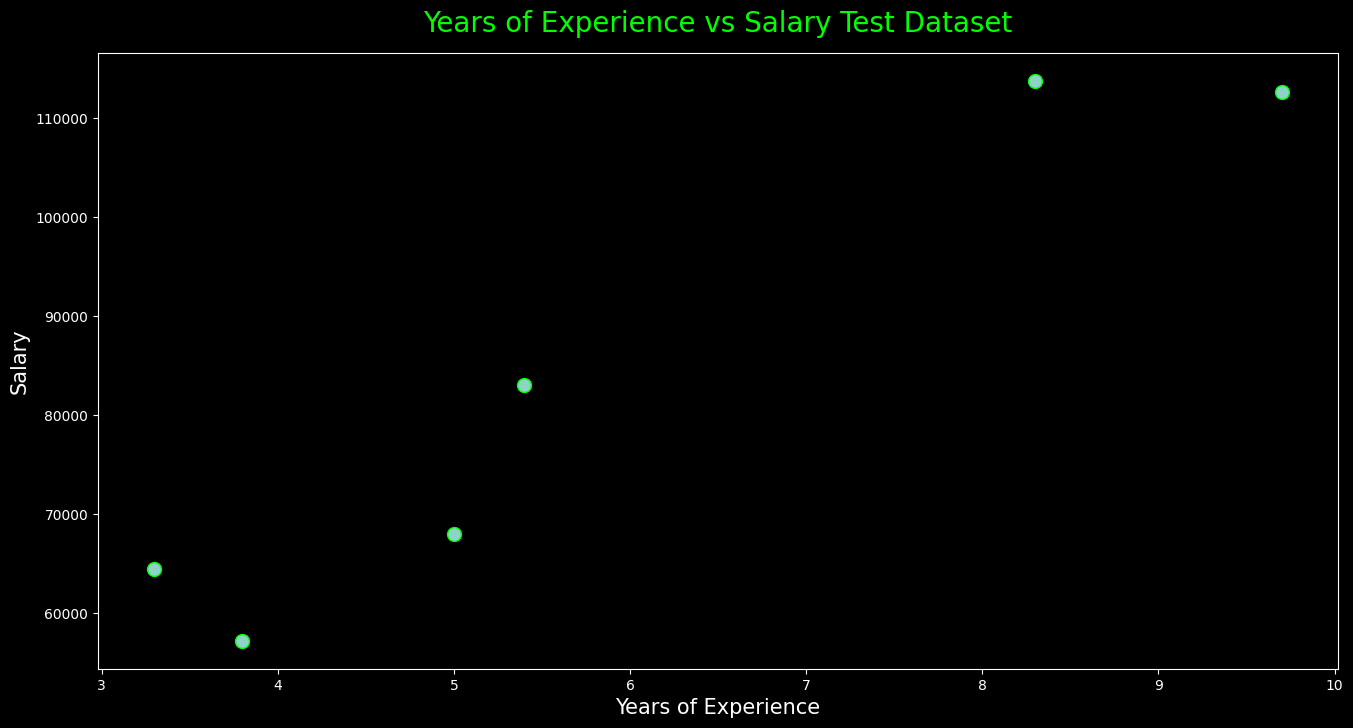

In [11]:
plt.figure(figsize=(16,8))
plt.scatter(X_test, y_test, marker="o", edgecolors="lime", s=100)
plt.title(label="Years of Experience vs Salary Test Dataset", fontdict={"color": "lime", "fontsize": 20}, pad=15)
plt.xlabel(xlabel="Years of Experience", fontsize=15)
plt.ylabel(ylabel="Salary", fontsize=15)
plt.show()

## Comparison of Predictions From Both Models

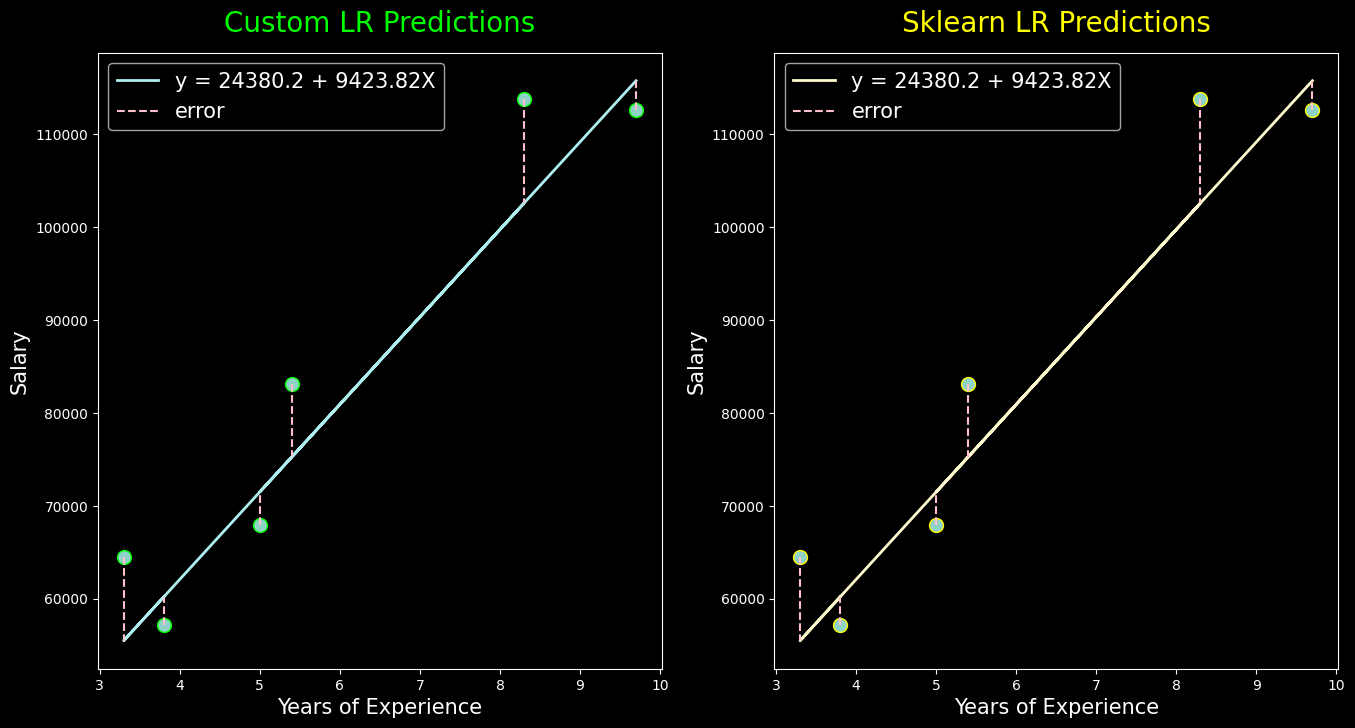

In [12]:
plt.figure(figsize=(16,8))

models = [{
    "model": lr_custom,
    "y_pred": y_pred_custom,
    "color_title": "lime",
    "label": "Custom",
    "color_line": "paleturquoise",
},
{
    "model": lr_sklearn,
    "y_pred": y_pred_sklearn,
    "color_title": "yellow",
    "label": "Sklearn",
    "color_line": "lemonchiffon"
},
]

for index, model in enumerate(models):
    plt.subplot(1, 2, index+1)
    plt.scatter(X_test, y_test, marker="o", edgecolors=model["color_title"], s=100)
    plt.title(label=model["label"] + " LR Predictions", fontdict={"color": model["color_title"], "fontsize": 20}, pad=15)
    plt.xlabel(xlabel="Years of Experience", fontsize=15)
    plt.ylabel(ylabel="Salary", fontsize=15)
    plt.plot(X_test, model["y_pred"], linewidth=2,
             color=model["color_line"],
             label=f"y = {model["model"].intercept_[0].round(2)} + {model["model"].coef_[0][0].round(2)}X")
    plt.vlines(X_test, ymin=y_test, ymax=model["y_pred"], linestyles="--", colors="pink", label="error")
    plt.legend(fontsize=15)

## Evaluate the models (Custom Evaluation)

In [13]:
for model in models:
    print()
    print(f"{model["label"]} LR")
    print("--------------\n")
    print(RegressionMetrics.metrics_dataframe(y_true=y_test, y_pred=model["y_pred"]))


Custom LR
--------------

           MSE     RMSE      MAE   R2
0  49830096.86  7059.04  6286.45  0.9

Sklearn LR
--------------

           MSE     RMSE      MAE   R2
0  49830096.86  7059.04  6286.45  0.9


In [14]:
for model in models:
    print()
    print(f"{model["label"]} LR")
    print("--------------\n")
    RegressionMetrics.print_metrics(y_true=y_test, y_pred=model["y_pred"])


Custom LR
--------------

MSE:     49830096.86
RMSE:    7059.04
MAE:     6286.45
R2:      0.9

Sklearn LR
--------------

MSE:     49830096.86
RMSE:    7059.04
MAE:     6286.45
R2:      0.9


## Evaluate the models (Sklearn Evaluation)

In [15]:
for model in models:
    print()
    print(f"{model["label"]} LR")
    print("--------------\n")
    print(f"MSE:     {mean_squared_error(y_true=y_test, y_pred=model["y_pred"]).round(2)}")
    print(f"RMSE:    {np.sqrt(mean_squared_error(y_true=y_test, y_pred=model["y_pred"]).round(2)).round(2)}")
    print(f"MAE:     {mean_absolute_error(y_true=y_test, y_pred=model["y_pred"]).round(2)}")
    print(f"R2:      {r2_score(y_true=y_test, y_pred=model["y_pred"]).round(2)}")


Custom LR
--------------

MSE:     49830096.86
RMSE:    7059.04
MAE:     6286.45
R2:      0.9

Sklearn LR
--------------

MSE:     49830096.86
RMSE:    7059.04
MAE:     6286.45
R2:      0.9
